<h3> Kaggle Competition: Titanic Machine Learning from Disaster</h3>  

<b> Task</b> : We ask you to complete the analysis of what sorts of people were likely to survivve. In particular we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.  


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
import statsmodels.api as sm
from pandas import Series, DataFrame 
import warnings
warnings.filterwarnings('ignore')
from patsy import dmatrices
from sklearn import datasets, svm

In [4]:
train = pd.read_csv('titanic_train.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.info()  #get a look at datatypes and any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<b>Summary:</b>
0 to 890 entries or 891 passengers 
<b> Features </b>    
<i>Pclass</i>: socio-econmic status based on Ticket Class 1- UpperClass  2- Middle  3-Lower  
<i> Embarked </i> :  Port of embarked from C = Cherbourg, Q = Queenstown, S = Southampton   
<i> SibSp<i/> :  Siblings and Spouses travelled with (excluding mistresses and fiances)    
<i>Parch </i> : 

<i>Columns with Missing Values</i>:  
1. Age 714
2. Cabin 204
3. Embarked 889  

<b> Deal With Missing Values: </b>
Drop the Cabin Column and Ticket column, since tickets determined the cabin so doesn't add much to our analysis  
Impute Age and Cabin with their respective mode 


In [10]:
train = train.drop(['Ticket', 'Cabin'], axis =1)
mode = train.filter(['Age', 'Embarked']).mode()
print(mode)

    Age Embarked
0  24.0        S


In [11]:
#impute missing values with their mode
cols = ['Age', 'Embarked']
train[cols] =  train[cols].fillna(train.mode().iloc[0])

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<b> Graphically visualise  our data</b>

In [16]:
#specifies the parameters of the graphs
fig = plt.figure(figsize=(18,6), dpi =1600)
alpha = alpha_scatter = 0.2
alpha_bar = 0.55

#plot different graphs together
ax1 = plt.subplot2grid((2,3),(0,0))
#bar graph of those who sruvived vs non-survivors
train.Survived.value_counts().plot(kind ='bar', alpha=alpha_bar) #returns total of each unique values
#sets margins in matplotlib to deal with recent bug in 1.3.1
ax1.set_xlim(-1,2)
plt.title('Distribution of Survival, (1=Survived)')

plt.subplot2grid((2,3),(0,1))
plt.scatter(train.Survived, train.Age, alpha = alpha_scatter)
plt.ylabel('Age/yrs')
#formats the gridline style of the graphs
plt.grid(b=True, which='major', axis ='y')
plt.title('Class Distribution')

ax3 = plt.subplot2grid((2,3), (0,0))
train.Pclass.value_counts().plot(kind='barh', alpha = alpha_bar)
ax3.set_ylim(-1, len(train.Pclass.value_counts()))
plt.title('Class Distribution')

ax5 = plt.subplot2grid((2,3), (1,2))
train.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar)
ax5.set_xlim(-1, len(train.Embarked.value_counts()))
plt.title('Passengers per boarding location')

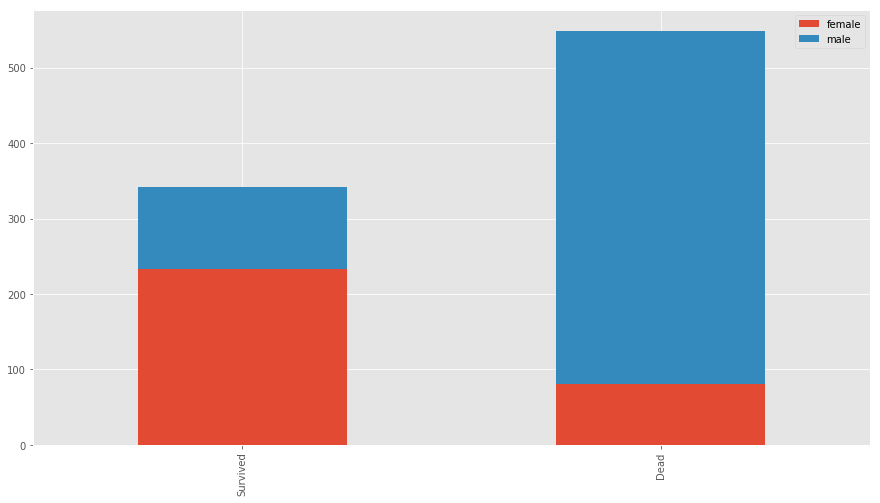

In [19]:
#Visualise Survival based on gender
import matplotlib
matplotlib.style.use('ggplot')
survived_sex = train[train['Survived']==1]['Sex'].value_counts() #making a series with all sex that survived
dead_sex = train[train['Survived']==0]['Sex'].value_counts()     #making a series with sex that didnt survive
df = pd.DataFrame([survived_sex, dead_sex])
df.index = ['Survived', 'Dead']
df.plot(kind='bar', stacked=True, figsize=(15,8))

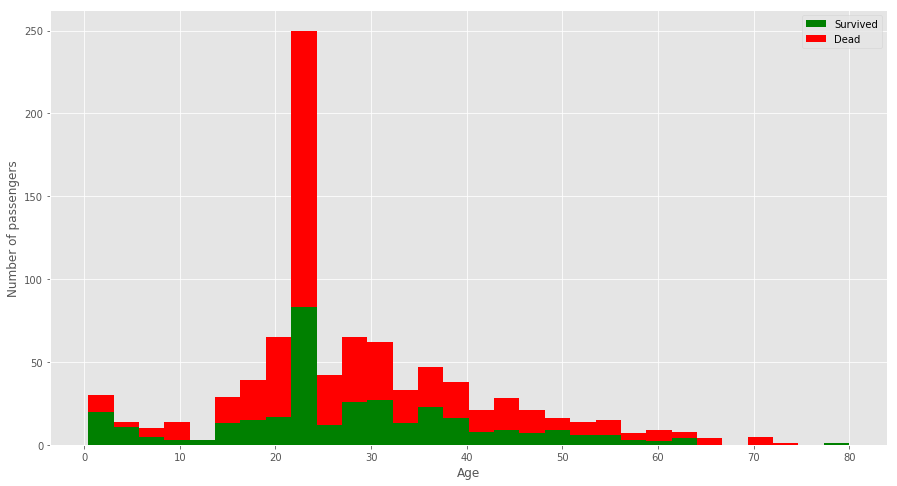

In [26]:
#Correlate the survival with age
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Age'], train[train['Survived']==0] ['Age']], stacked=True, color =['g', 'r'],
        bins=30, label=['Survived', 'Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

from the graphs, it seems that persons between 0-10 are more likely to survive than those who are older than 12 and less than 50.

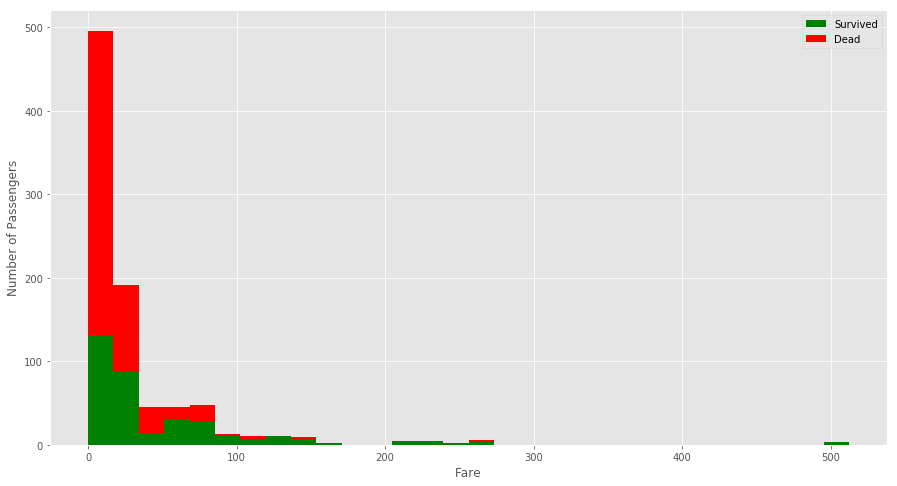

In [32]:
#Fare and survival
figure =plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Fare'], train[train['Survived']==0]['Fare']], stacked=True, color=['g','r'], 
               bins=30, label=['Survived', 'Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend()

Comments: Passengers with cheaper fare are most likely to die--> so people who could afford more expensive tickets, the ones most likely to live,  were most likely of higher socioeconmic status 

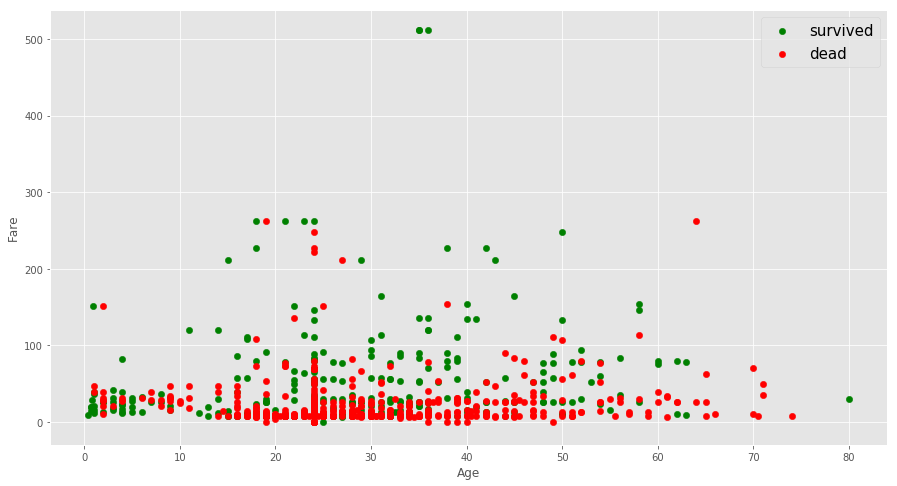

In [36]:
#Combine Age fare and survival on a single chart
plt.figure(figsize=(15,8))
ax=plt.subplot()
ax.scatter(train[train['Survived']==1]['Age'] , train[train['Survived']==1]['Fare'], c='green', s=40)
ax.scatter(train[ train['Survived']==0]['Age'], train[train['Survived']==0]['Fare'], c='red', s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived', 'dead'), scatterpoints=1, loc='upper right', fontsize=15)

comments: there is a distinct red cluster of dead passengers between 15 and 50 with low fare prices appears, which again corresponds to lower class passengers

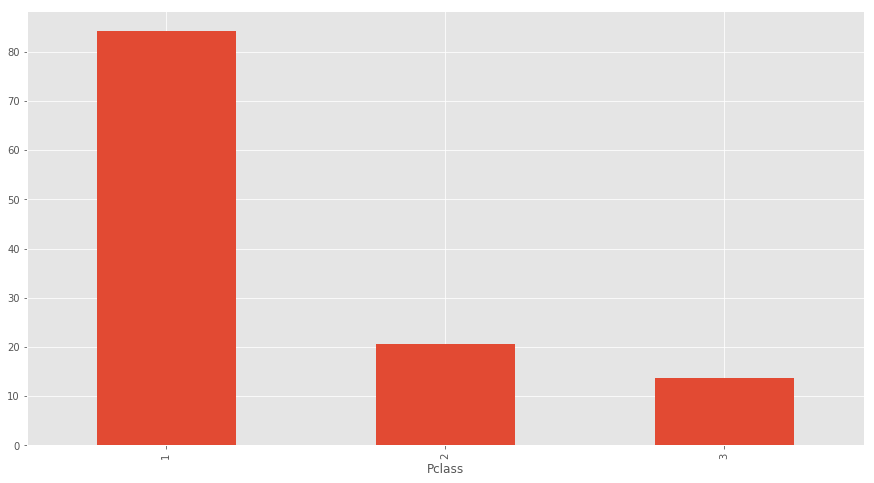

In [37]:
#correlate fare and class
ax= plt.subplot()
ax.set_ylabel=('Average Fare')
train.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(15,8), ax=ax)

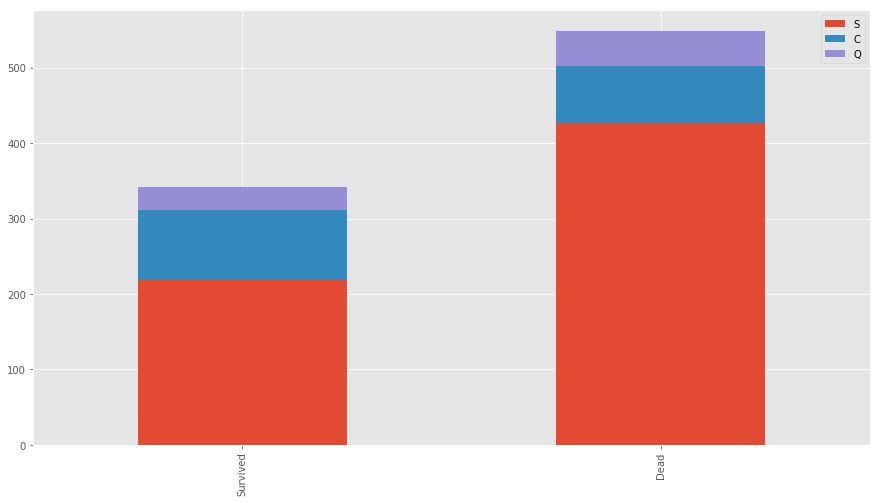

In [42]:
#Let's see how embarkation site affect survival, as it town of origin may be related to socioeconomic class

survived_embark = train[train['Survived']==1]['Embarked'].value_counts()  #returns total of each unique values i.e. all from C who survived, allfrom S who survived all from Q who survived
dead_embark = train[train['Survived']==0]['Embarked'].value_counts()
df=pd.DataFrame([survived_embark, dead_embark])
df.index = ['Survived', 'Dead']
df.plot(kind='bar', stacked=True, figsize=(15,8))

the ratio between all 3 towns is consistent for both survived and dead

<h3> Feature Engineering</h3>

Features like names and tickets were difficult to tease in their native state, so with feature engineering we can transform these features in a way that is easily fed into the machine learning algorithms

<b> Loading the Data</b>  
One method is to combine the test set and training set especially if the test set has features not present in the train set.?Hmmm


In [44]:
def status(feature):
    print('Processing', feature, ':ok')
 #asserts if feature was processed properly   

In [50]:
def get_combined_data():
    train2 = pd.read_csv('titanic_train.csv')
    test = pd.read_csv('titanic_test.csv')
    
    #extract, then remove targets from training data
    targets = train.Survived  #survived column
    train2.drop('Survived',1, inplace=True)
    
    #merging train data and test data for future feature engineering
    combined = train2.append(test)
    combined.reset_index(inplace = True)  #because Survived column was drop, reset the index so it's in order again. Always do that
    combined.drop('index', inplace =True, axis=1) 
    
    return combined
#inplace = True means that changes are made to the original object, inplace=false means that the object is copied
#and modifications are made to the copy of the object. So the update is done in place, on the actual dataframe or object

In [51]:
combined=get_combined_data()

In [52]:
combined.shape


(1309, 11)

In [53]:
combined.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<h3> Extracting the Passenger Titles</h3>

It's observed that each name has a title in it, not just Miss or Mr, but like Master and Dona which can be parsed for inferences about the social status of the passenger


In [56]:
def get_titles():
    global combined  #makes the variable available outside scope of function
    
    #extract Title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip()) #recall lambda is a function
                                                        #e..g Rice, Master. Eugene
    # a map of more aggregated, possible  titles
    Title_Dictionary = {"Capt":      "Officer",
                        "Col":       "Officer",
                        "Major":     "Officer",
                        "Jonkheer":  "Royalty",
                        "Don":       "Royalty",
                        "Dona":      "Royalty",
                        "the Countess": "Royalty",
                        "Sir":        "Royalty",
                        "Rev" :       "Officer",
                        "Mme" :        "Mrs",
                        "Mlle":        "Miss",
                        "Ms":          "Miss",
                        "Mr":         "Mr",
                        "Mrs":        "Mrs",
                        "Miss":       "Miss",
                        "Master":     "Master",
                        "Lady":       "Royalty"
                        
                       }
    #map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
    
    #The function parses the names, etracts the titles and then it maps the titles to categories of titles

In [57]:
get_titles()

In [58]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


Now we have a column called <b> Title</b> !  

<h3>Processing the Ages</h3>

As previously observed, Age features was missing 177 values (~13%). Simply replacing them with the mean or median may not be the best solution since age differs groups and categories of passesngers. To understand why, let's group the dataset by sex, title, class and then compute the median age for each
to avoid leakage of the dataset, perform the operations separately on the test and train set



In [60]:
grouped_train = combined.head(891).groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()

grouped_test = combined.iloc[891:].groupby(['Sex','Pclass','Title'])
grouped_median_test = grouped_test.median()

In [61]:
grouped_median_train

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      Miss           369.0  30.0    0.0    0.0   88.25000
              Mrs            499.0  40.0    1.0    0.0   79.20000
              Royalty        658.5  40.5    0.5    0.0   63.05000
       2      Miss           444.0  24.0    0.0    0.0   13.00000
              Mrs            438.0  32.0    1.0    0.0   26.00000
       3      Miss           372.0  18.0    0.0    0.0    8.75625
              Mrs            405.5  31.0    1.0    1.0   15.97500
male   1      Master         446.0   4.0    1.0    2.0  120.00000
              Mr             463.0  40.0    0.0    0.0   42.40000
              Officer        648.0  56.0    0.0    0.0   30.50000
              Royalty        600.0  40.0    0.0    0.0   27.72080
       2      Master         408.0   1.0    1.0    1.0   26.00000
              Mr             440.0  31.0    0.0    0.0   13.00000
              Officer        438.5  46.5    0.0    0.0   13.00000
       3      Master         270.5   4.0    3.5    1.0   28.51250
              Mr             472.0  26.0    0.0    0.0    7.89580

In [62]:
grouped_median_test

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      Miss          1074.0  32.0    0.0    0.0  158.20835
              Mrs           1076.0  48.0    1.0    0.0   63.35830
              Royalty       1306.0  39.0    0.0    0.0  108.90000
       2      Miss          1121.0  19.5    1.0    1.0   24.50000
              Mrs           1123.5  29.0    0.0    0.0   26.00000
       3      Miss          1089.0  22.0    0.0    0.0    7.87920
              Mrs           1051.0  28.0    1.0    1.0   14.45420
male   1      Master        1022.0   9.5    1.0    2.0  198.43750
              Mr            1102.0  42.0    0.0    0.0   50.24790
              Officer       1058.5  50.0    0.5    0.0  128.01250
       2      Master        1033.5   5.0    0.5    1.5   27.75000
              Mr            1156.0  28.0    0.0    0.0   13.00000
              Officer       1048.5  35.5    0.5    0.5   19.50000
       3      Master        1173.0   7.0    1.0    1.0   15.24580
              Mr            1101.0  25.0    0.0    0.0    7.85420

Clearly the median age differs based on Se, Pclass and Title. E.g. a female passenger from Pclass 1 with a royalty title had a median age of 39  

Create a function that fills in the missing age in <b> combined</b> based on these different attributes

In [ ]:
def process_age():
    global combined
    
    def fillAges(row, grouped_median):
        if row['Sex']=='female' and row['Pclass']==1:
            